# Tutorial 1 - BASIC PS

This is a nice tutorial on how to use this PS in that ENV. First we need some imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Projective simulation must be installed locally for the following imports to work (see README!)
from projective_simulation.agents import Basic_2Layer_Agent as PS_agent
from projective_simulation.environments import RLGL

Now we do some calculations

In [ ]:
#Number of steps to run simulation
T = 1000

env = RLGL() #create a default red-light-green-light environment
agent = PS_agent(num_actions = 2, glow = 1, damp = 0., policy = 'softmax', policy_parameters = 1) # create a basic PS agent with two actions
data_log = [None] * T

for t in range(T):
    observation = env.get_observation()
    action = agent.get_action(observation)
    reward = env.get_reward(action)
    agent.update(reward)
    data_log[t] = {"env_state": env.state, "action": action, "reward": reward}
    env.transition(action)

And now we plot our results

[<matplotlib.lines.Line2D>]

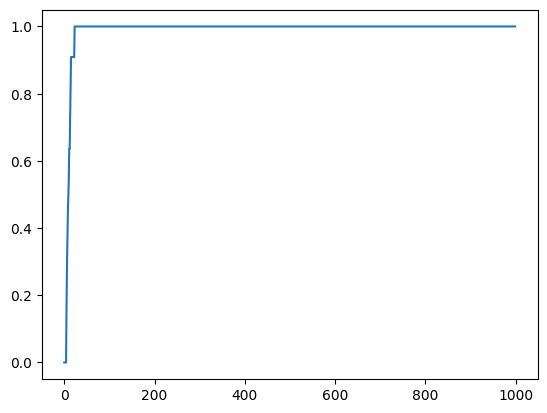

In [ ]:
plt.plot(range(T), [np.mean([data_log[step]["reward"] for step in range(i-10,i+1) if step >= 0]) for i in range(T)]) #plot a 10 step moving average of the reward       